# Lehká analýza

1. Celkový pohled na data 
2. Základní statistiky: min, max, mean, median, standard deviation, korelace atd.
3.  Groupby
4. Statistické testy: test normality, párové testy
5. Lineární regrese

In [3]:
import pandas as pd

In [4]:
pokemon_df = pd.read_csv("../data/Pokemon.csv", index_col="id")

## Základní údaje o datech

Počet řádků a sloupců

In [5]:
pokemon_df.shape

(807, 20)

Přehled o platných a neplatných hodnotách a datových typech.

In [6]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 1 to 807
Data columns (total 20 columns):
name                      807 non-null object
height                    807 non-null float64
weight                    807 non-null float64
color                     807 non-null object
shape                     807 non-null object
is baby                   807 non-null bool
type 1                    807 non-null object
type 2                    405 non-null object
hp                        807 non-null int64
attack                    807 non-null int64
defense                   807 non-null int64
sp. attack                807 non-null int64
sp. defense               807 non-null int64
speed                     807 non-null int64
total                     807 non-null int64
generation                807 non-null int64
evolves from              387 non-null float64
evolution group           807 non-null int64
fm gender ratio           807 non-null object
has_gender_differences    807

Pomocí metody `count` lze získat stejné údaje jako výše, ale ve strojově přívětivějším formátu.

In [7]:
pokemon_df.count()

name                      807
height                    807
weight                    807
color                     807
shape                     807
is baby                   807
type 1                    807
type 2                    405
hp                        807
attack                    807
defense                   807
sp. attack                807
sp. defense               807
speed                     807
total                     807
generation                807
evolves from              387
evolution group           807
fm gender ratio           807
has_gender_differences    807
dtype: int64

## A teď už nějaká statistika

Metoda `describe` vypíše základní statistické ukazatele: počet, průměr, standardní odchylku, minimum, maximum a kvantily. Výsedek je opět DataFrame, takže na něj můžeme použít vše, co umíme.

In [8]:
pokemon_df.describe() #.loc["min" : "max"]

,id,height,weight,hp,attack,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,has_gender_differences
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,387.000000,807.000000,807.000000
mean,404.000000,1.162454,61.771128,68.748451,76.086741,71.726146,69.486989,70.013631,65.830235,421.892193,3.714994,368.457364,199.174721,0.121437
std,233.105126,1.081030,111.519355,26.032808,29.544598,29.730228,29.439715,27.292344,27.736838,111.038051,1.944148,233.367619,125.005530,0.326837
min,1.000000,0.100000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,1.000000,1.000000,0.000000
25%,202.500000,0.600000,9.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,321.500000,2.000000,158.500000,86.500000,0.000000
50%,404.000000,1.000000,27.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,431.000000,4.000000,353.000000,192.000000,0.000000
75%,605.500000,1.500000,63.000000,80.000000,95.000000,89.000000,90.000000,85.000000,85.000000,500.000000,5.000000,574.500000,306.500000,0.000000
max,807.000000,14.500000,999.900000,255.000000,181.000000,230.000000,173.000000,230.000000,160.000000,720.000000,7.000000,803.000000,427.000000,1.000000


Jednotlivé hodnoty můžeme zjistit i přímo, buď pro všechny sloupce najednou.

In [9]:
pokemon_df.max()

id                            807
name                      zygarde
height                       14.5
weight                      999.9
color                      yellow
shape                       wings
is baby                      True
type 1                      Water
hp                            255
attack                        181
defense                       230
sp. attack                    173
sp. defense                   230
speed                         160
total                         720
generation                      7
evolves from                  803
evolution group               427
fm gender ratio               7:1
has_gender_differences          1
dtype: object

Nebo pro každý zvlášť, pomocí indexování.

In [10]:
pokemon_df["weight"].max()

999.9

In [11]:
pokemon_df["weight"].mean()

61.771127633209396

In [12]:
pokemon_df["weight"].median()
# medián je 50% kvantil

27.0

In [13]:
pokemon_df["weight"].mode()
# mode, česky modus je hodnota s nepočetnějším výskytem 

0    5.0
dtype: float64

Pokud chceme vědět, který pokemon je nejtěžší použijeme `idmax`.

In [14]:
print(pokemon_df["weight"].idxmax())
pokemon_df.iloc[pokemon_df["weight"].idxmax()]

789


id                            790
name                      cosmoem
height                        0.1
weight                      999.9
color                        blue
shape                        ball
is baby                     False
type 1                    Psychic
type 2                        NaN
hp                             43
attack                         29
defense                       131
sp. attack                     29
sp. defense                   131
speed                          37
total                         400
generation                      7
evolves from                  789
evolution group               413
fm gender ratio               0:0
has_gender_differences          0
Name: 789, dtype: object

Nebo můžeme dataframe seřadit podle váhy a kouknout se na prvního pokemona.

In [8]:
pokemon_df.sort_values(by="weight", ascending=False).head()

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
796,797,celesteela,9.2,999.9,green,humanoid,False,Steel,Flying,97,...,103,107,101,61,570,7,NaN,418,0:0,0
789,790,cosmoem,0.1,999.9,blue,ball,False,Psychic,NaN,43,...,131,29,131,37,400,7,789.0,413,0:0,0
382,383,groudon,3.5,950.0,red,upright,False,Ground,NaN,100,...,140,100,90,90,670,3,NaN,199,0:0,0
749,750,mudsdale,2.5,920.0,brown,quadruped,False,Ground,NaN,100,...,100,55,85,35,500,7,749.0,386,1:1,0
798,799,guzzlord,5.5,888.0,black,upright,False,Dark,Dragon,223,...,53,97,53,43,570,7,NaN,420,0:0,0


**Cvičení** Spočítejte průměrnou váhu dospělých Pokémonů lehčích než nějtěžší baby pokémon.

## Groupby
Poslední důležitou operací je groupby ta rozdělí DataFrame podle nějaké kategorické proměnné nebo taky podle funkce do skupin.

In [11]:
# sloupec 'id' zahodíme aby nepřekážel ve výpisu
pokemon_df.groupby("shape").describe()

height                                                    weight  \
           count      mean       std  min    25%   50%    75%   max  count   
shape                                                                        
armor       38.0  0.736842  0.529876  0.1  0.325  0.55  1.075   2.5   38.0   
arms        45.0  0.960000  0.561815  0.1  0.500  0.90  1.300   2.4   45.0   
ball        37.0  0.624324  0.402358  0.1  0.300  0.50  0.900   1.5   37.0   
blob        33.0  1.006061  0.725405  0.2  0.500  1.00  1.300   3.9   33.0   
bug-wings   19.0  1.200000  0.414997  0.2  1.000  1.20  1.500   1.9   19.0   
fish        36.0  1.452778  2.376851  0.2  0.600  0.90  1.225  14.5   36.0   
heads       15.0  0.826667  0.438287  0.3  0.450  0.70  1.250   1.6   15.0   
humanoid   124.0  1.139516  0.933985  0.2  0.600  1.00  1.500   9.2  124.0   
legs        19.0  0.684211  0.510189  0.2  0.400  0.50  0.700   2.0   19.0   
quadruped  151.0  1.145033  0.816390  0.2  0.600  1.00  1.500   5.5  151.0   
squiggle    32.0  2.496875  2.537650  0.2  0.700  1.50  3.350   9.2   32.0   
tentacles   18.0  1.355556  0.964196  0.4  0.900  1.10  1.575   4.5   18.0   
upright    168.0  1.186310  0.748646  0.2  0.600  1.00  1.500   5.5  168.0   
wings       72.0  1.281944  1.076160  0.2  0.575  1.10  1.525   5.8   72.0   

                       ... evolution group        has_gender_differences  \
                 mean  ...             75%    max                  count   
shape                  ...                                                 
armor       30.897368  ...          317.25  387.0                   38.0   
arms        40.413333  ...          344.00  421.0                   45.0   
ball        64.237838  ...          304.00  413.0                   37.0   
blob        38.109091  ...          349.00  407.0                   33.0   
bug-wings   34.431579  ...          210.50  382.0                   19.0   
fish        55.925000  ...          303.00  405.0                   36.0   
heads       89.740000  ...          305.00  353.0                   15.0   
humanoid    62.096774  ...          290.75  427.0                  124.0   
legs        23.194737  ...          179.50  392.0                   19.0   
quadruped   81.317881  ...          297.50  425.0                  151.0   
squiggle    85.812500  ...          362.00  406.0                   32.0   
tentacles  115.477778  ...          361.00  415.0                   18.0   
upright     64.836905  ...          285.00  424.0                  168.0   
wings       42.662500  ...          319.25  424.0                   72.0   

                                                        
               mean       std  min  25%  50%  75%  max  
shape                                                   
armor      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
arms       0.044444  0.208409  0.0  0.0  0.0  0.0  1.0  
ball       0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
blob       0.030303  0.174078  0.0  0.0  0.0  0.0  1.0  
bug-wings  0.315789  0.477567  0.0  0.0  0.0  1.0  1.0  
fish       0.166667  0.377964  0.0  0.0  0.0  0.0  1.0  
heads      0.066667  0.258199  0.0  0.0  0.0  0.0  1.0  
humanoid   0.153226  0.361666  0.0  0.0  0.0  0.0  1.0  
legs       0.210526  0.418854  0.0  0.0  0.0  0.0  1.0  
quadruped  0.152318  0.360525  0.0  0.0  0.0  0.0  1.0  
squiggle   0.093750  0.296145  0.0  0.0  0.0  0.0  1.0  
tentacles  0.166667  0.383482  0.0  0.0  0.0  0.0  1.0  
upright    0.113095  0.317656  0.0  0.0  0.0  0.0  1.0  
wings      0.152778  0.362298  0.0  0.0  0.0  0.0  1.0  

[14 rows x 104 columns]

In [12]:
# rozdělení podle funkce:
# funkce se zavolá postupně na každou položku indexu a její výstup se použije k zařazení dané položky do skupiny
def get_weight_category(irow):
    row = pokemon_df.loc[irow]
    if row.weight < 9:
        return "light"
    elif row.weight < 30:
        return "medium"
    else:
        return "heavy"
    
pokemon_df.groupby(by=get_weight_category).describe()

height                                                 weight  \
        count      mean       std  min  25%  50%    75%   max  count   
heavy   378.0  1.728307  1.318555  0.1  1.1  1.5  1.875  14.5  378.0   
light   199.0  0.456281  0.250954  0.1  0.3  0.4  0.500   2.0  199.0   
medium  230.0  0.843478  0.363902  0.3  0.6  0.8  1.000   4.0  230.0   

                    ... evolution group        has_gender_differences  \
              mean  ...             75%    max                  count   
heavy   118.546296  ...          303.50  427.0                  378.0   
light     4.210050  ...          341.50  424.0                  199.0   
medium   18.265217  ...          302.25  426.0                  230.0   

                                                     
            mean       std  min  25%  50%  75%  max  
heavy   0.145503  0.353074  0.0  0.0  0.0  0.0  1.0  
light   0.070352  0.256384  0.0  0.0  0.0  0.0  1.0  
medium  0.126087  0.332671  0.0  0.0  0.0  0.0  1.0  

[3 rows x 104 columns]

## Statistické testy

Na základní statistiku nám stačí `scipy` a její modul `stats`. Pro pokročilejší analýzu existují například [`statsmodels`](https://www.statsmodels.org/stable/index.html), [`spm`](http://www.spm1d.org/) a jiné. 

In [16]:
import scipy.stats as st

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100 # bigger figures, yayy!

Test normality

In [18]:
st.normaltest(pokemon_df["weight"])

NormaltestResult(statistic=820.8751735153749, pvalue=5.6133342769384294e-179)

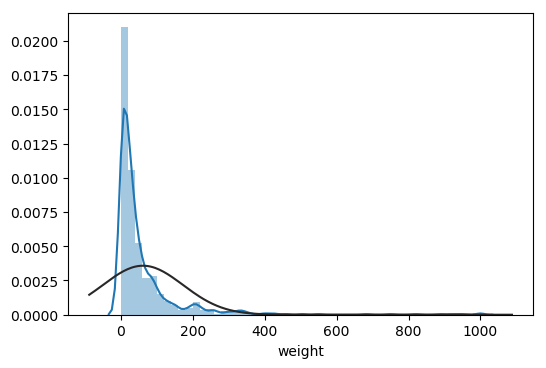

In [19]:
sns.distplot(pokemon_df["weight"], fit=st.norm)

Trochu pokročilejší použití pandas, scipy.stats a matplotlibu: test sloupců na normalitu dat.

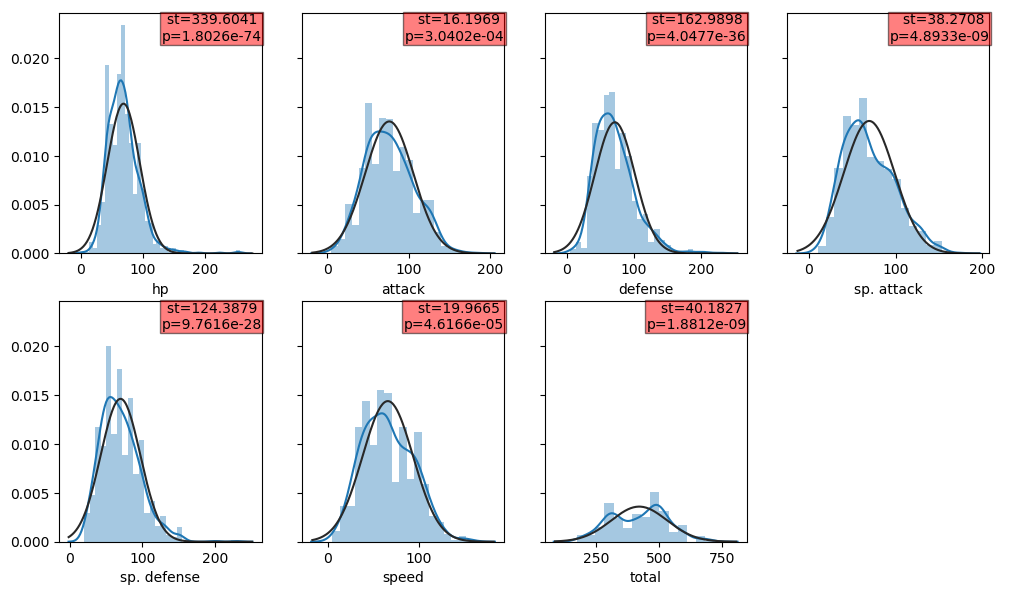

In [41]:
fig, axs = plt.subplots(ncols=len(pokemon_df.loc[:, "hp" : "total"].columns)//2 + 1, nrows=2, figsize=(12, 7), sharey=True)
for col, ax in zip(pokemon_df.loc[:, "hp" : "total"].columns, axs.flatten()):
    
    ntest = st.normaltest(pokemon_df[col])
    
    sns.distplot(pokemon_df[col], fit=st.norm, ax=ax)
    ax.text(ax.get_xlim()[1], ax.get_ylim()[1], "st=%.4f \np=%.4e" % ntest, 
            ha='right', va='top',
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':1} if ntest.pvalue < .005 else None)
axs[-1, -1].axis("off");

Jednoduchý párový test - data nemají normální rozdělení musíme použít nějaký neparametrický třeba Kruskal-Wallis

In [40]:
st.kruskal(pokemon_df[pokemon_df["shape"] == "quadruped"]["speed"], 
           pokemon_df[pokemon_df["shape"] == "upright"]["speed"])

KruskalResult(statistic=0.13407487384731367, pvalue=0.7142439271109309)

*Závěr*: Rychlost čtyřnohých a dvounohých Pokémonů se statisticky významně *neliší*.

## Lineární regrese

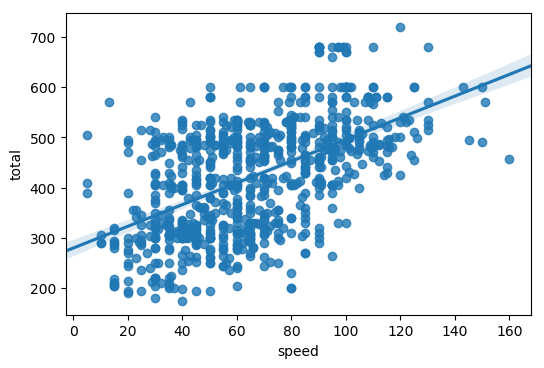

In [47]:
sns.regplot(x="speed", y="total", data=pokemon_df)

In [48]:
st.linregress(pokemon_df["speed"], pokemon_df["total"])

LinregressResult(slope=2.157702991894385, intercept=279.85009734276434, rvalue=0.5389851337094776, pvalue=5.286171466031664e-62, stderr=0.11884792793925342)